# Convolutional Neural Networks

## Project: Landmark Classification




In [1]:
# Install requirements 
!pip install -r requirements.txt | grep -v "already satisfied"

  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/9d/d7/e2aaf344254292d2046f9984b54212e4e7d69a57d30ae15e7294840710f6/opencv_python_headless-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for pytest from https://files.pythonhosted.org/packages/df/d0/e192c4275aecabf74faa1aacd75ef700091913236ec78b1a98f62a2412ee/pytest-7.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for pluggy<2.0,>=0.12 from https://files.pythonhosted.org/packages/05/b8/42ed91898d4784546c5f06c60506400548db3f7a4b3fb441cba4e5c17952/pluggy-1.3.0-py3-none-any.whl.metadata
  Using cached pluggy-1.3.0-py3-none-any.whl.metadata (4.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.5/324.5 kB 7.8 MB/s eta 0:00:00:00:01
Using cached pluggy-1.3.0-py3-none-any.whl (18 kB)


In [2]:
!pip install -U pytest

In [3]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory landmark_images
Reusing cached mean and std


---
## Data



In [11]:
!pytest -vv src/data.py -k data_loaders

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.2, pluggy-1.3.0 -- /home/ec2-user/anaconda3/envs/pytorch_p310/bin/python3.10
cachedir: .pytest_cache
rootdir: /home/ec2-user/SageMaker
plugins: anyio-3.7.1
collected 4 items / 1 deselected / 3 selected                                  

src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 1.88s ========================


In [12]:
!pytest -vv src/data.py -k visualize_one_batch

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.2, pluggy-1.3.0 -- /home/ec2-user/anaconda3/envs/pytorch_p310/bin/python3.10
cachedir: .pytest_cache
rootdir: /home/ec2-user/SageMaker
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                  

src/data.py::test_visualize_one_batch PASSED                             [100%]

======================= 1 passed, 3 deselected in 2.09s ========================


Visualizing data

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
Reusing cached mean and std
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])


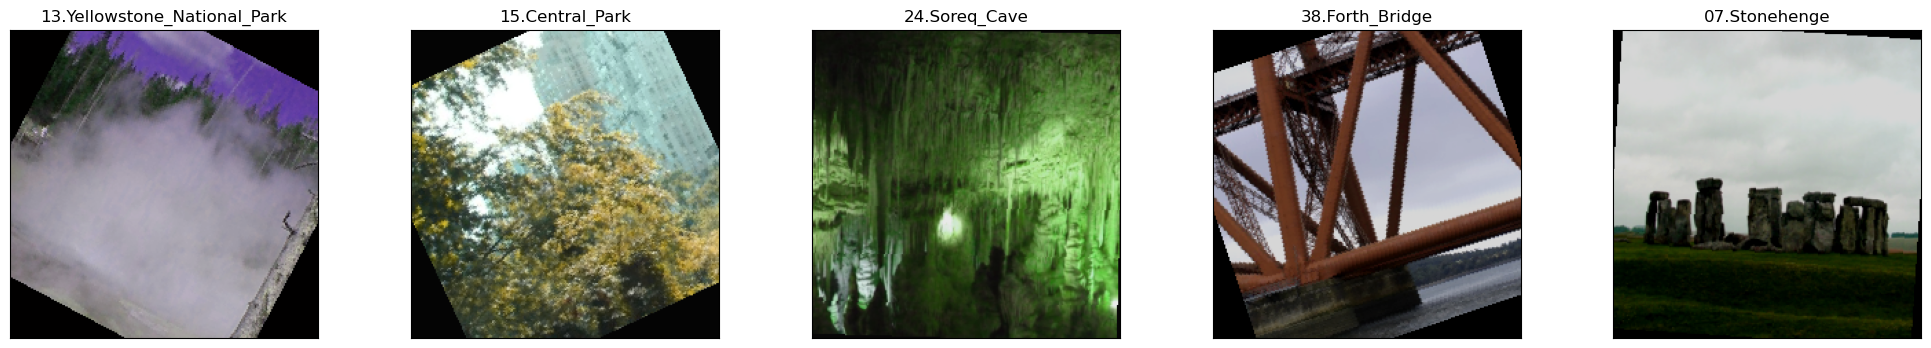

In [13]:
%matplotlib inline
from src.data import visualize_one_batch, get_data_loaders

# use get_data_loaders to get the data_loaders dictionary. Use a batch_size
# of 5, a validation size of 0.01 and num_workers=-1 (all CPUs)
data_loaders = get_data_loaders(batch_size=5, num_workers=0,valid_size=0.01)

visualize_one_batch(data_loaders)

---
## model



In [15]:
!pytest -vv src/model.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.2, pluggy-1.3.0 -- /home/ec2-user/anaconda3/envs/pytorch_p310/bin/python3.10
cachedir: .pytest_cache
rootdir: /home/ec2-user/SageMaker
plugins: anyio-3.7.1
collected 1 item                                                               

src/model.py::test_model_construction PASSED                             [100%]

============================== 1 passed in 2.23s ===============================


---
##  Defining loss and optimizer



In [16]:
!pytest -vv src/optimization.py -k get_loss

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.2, pluggy-1.3.0 -- /home/ec2-user/anaconda3/envs/pytorch_p310/bin/python3.10
cachedir: .pytest_cache
rootdir: /home/ec2-user/SageMaker
plugins: anyio-3.7.1
collected 7 items / 6 deselected / 1 selected                                  

src/optimization.py::test_get_loss PASSED                                [100%]

======================= 1 passed, 6 deselected in 1.13s ========================


In [17]:
!pytest -vv src/optimization.py -k get_optimizer

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.2, pluggy-1.3.0 -- /home/ec2-user/anaconda3/envs/pytorch_p310/bin/python3.10
cachedir: .pytest_cache
rootdir: /home/ec2-user/SageMaker
plugins: anyio-3.7.1
collected 7 items / 1 deselected / 6 selected                                  

src/optimization.py::test_get_optimizer_type PASSED                      [ 16%]
src/optimization.py::test_get_optimizer_is_linked_with_model PASSED      [ 33%]
src/optimization.py::test_get_optimizer_returns_adam PASSED              [ 50%]
src/optimization.py::test_get_optimizer_sets_learning_rate PASSED        [ 66%]
src/optimization.py::test_get_optimizer_sets_momentum PASSED             [ 83%]
src/optimization.py::test_get_optimizer_sets_weight_decat PASSED         [100%]

======================= 6 passed, 1 deselected in 1.13s ========================


---
## Training  and Validating the Model



In [10]:
!pytest -vv src/train.py -k train_one_epoch

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.2, pluggy-1.3.0 -- /home/ec2-user/anaconda3/envs/pytorch_p310/bin/python3.10
cachedir: .pytest_cache
rootdir: /home/ec2-user/SageMaker
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_train_one_epoch PASSED                                [100%]

================= 1 passed, 3 deselected in 151.54s (0:02:31) ==================


In [18]:
!pytest -vv src/train.py -k valid_one_epoch

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.2, pluggy-1.3.0 -- /home/ec2-user/anaconda3/envs/pytorch_p310/bin/python3.10
cachedir: .pytest_cache
rootdir: /home/ec2-user/SageMaker
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_valid_one_epoch PASSED                                [100%]

================= 1 passed, 3 deselected in 148.45s (0:02:28) ==================


In [12]:
!pytest -vv src/train.py -k optimize

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.2, pluggy-1.3.0 -- /home/ec2-user/anaconda3/envs/pytorch_p310/bin/python3.10
cachedir: .pytest_cache
rootdir: /home/ec2-user/SageMaker
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_optimize PASSED                                       [100%]

======================= 1 passed, 3 deselected in 16.44s =======================


In [13]:
!pytest -vv src/train.py -k one_epoch_test

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.2, pluggy-1.3.0 -- /home/ec2-user/anaconda3/envs/pytorch_p310/bin/python3.10
cachedir: .pytest_cache
rootdir: /home/ec2-user/SageMaker
plugins: anyio-3.7.1
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_one_epoch_test PASSED                                 [100%]

======================= 1 passed, 3 deselected in 9.97s ========================


---
##  Putting everything together



In [5]:
batch_size = 32      # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2       # fraction of the training data to reserve for validation
num_epochs = 120   # number of epochs for training .
dropout = 0.5        # dropout for our model
learning_rate = 0.0001  # Learning rate for SGD (or Adam)
opt = 'sgd'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.02  # regularization. 

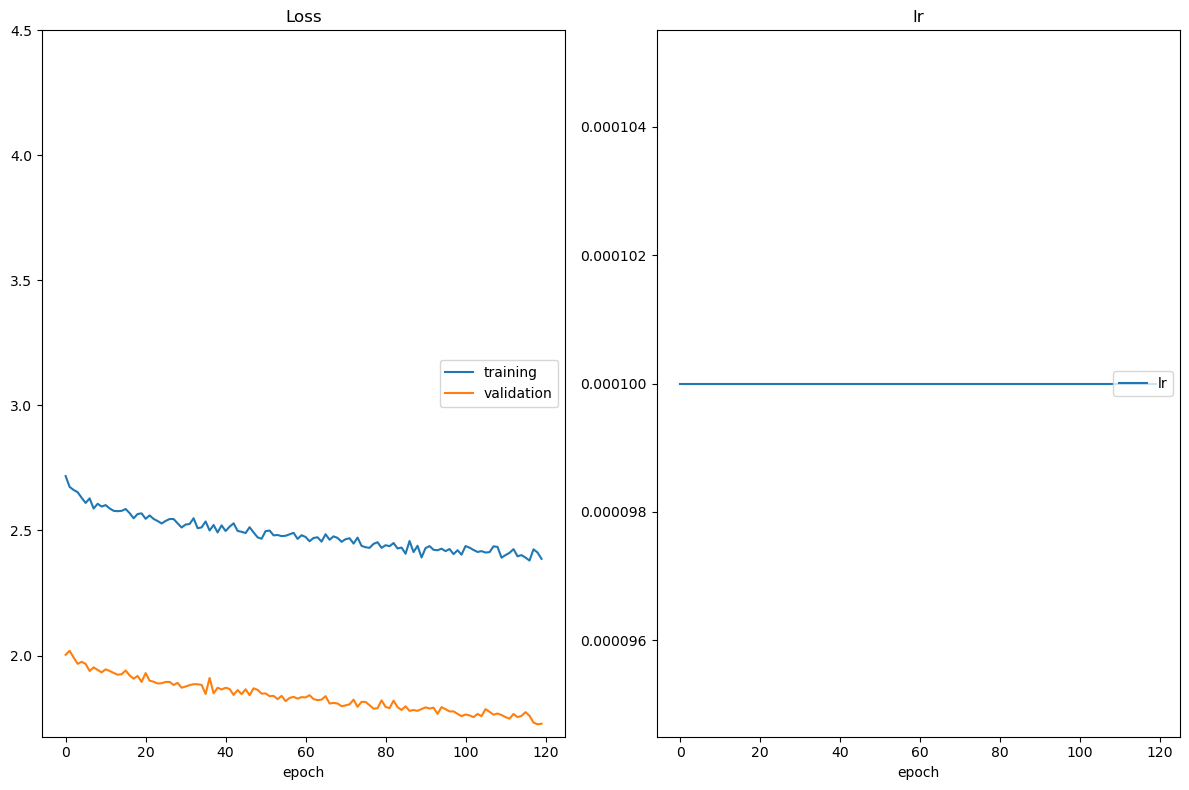

In [ ]:
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import MyModel
import torch


data_loaders =  get_data_loaders(batch_size=batch_size, valid_size=valid_size)


model = MyModel(num_classes=num_classes, dropout=dropout)
checkpoint_path = 'checkpoints/best_val_loss_v9.pt'
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint)


optimizer = get_optimizer(
    model,
    optimizer=opt,
    learning_rate=learning_rate,
    weight_decay=weight_decay
)


loss =get_loss()

optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/best_val_loss_v10.pt",
    interactive_tracking=True
)

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


---
## Testing against the Test Set



In [7]:
# load the model that got the best validation accuracy
from src.train import one_epoch_test
from src.model import MyModel
import torch

model = MyModel(num_classes=num_classes, dropout=dropout)

# YOUR CODE HERE: load the weights in 'checkpoints/best_val_loss.pt'
checkpoint_path = 'checkpoints/best_val_loss_v10.pt'
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint)


# Run test
one_epoch_test(data_loaders['test'], model, loss)

Testing: 100%|██████████████████████████████████| 40/40 [00:36<00:00,  1.10it/s]

Test Loss: 1.953061


Test Accuracy: 52% (652/1250)


1.9530608452856548

---
## Export using torchscript



In [15]:
!pytest -vv src/predictor.py

============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.4.2, pluggy-1.3.0 -- /home/ec2-user/anaconda3/envs/pytorch_p310/bin/python3.10
cachedir: .pytest_cache
rootdir: /home/ec2-user/SageMaker
plugins: anyio-3.7.1
collected 1 item                                                               

src/predictor.py::test_model_construction PASSED                         [100%]

=============================== warnings summary ===============================
src/predictor.py::test_model_construction
  /home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), a

Allright, now we are ready to export our model using our Predictor class:

In [17]:

from src.predictor import Predictor
from src.helpers import compute_mean_and_std
from src.model import MyModel
from src.data import get_data_loaders
import torch

data_loaders = get_data_loaders(batch_size=1)


class_names = data_loaders["train"].dataset.classes


model = MyModel(num_classes=50, dropout=0.5).cpu()


model.load_state_dict(torch.load("checkpoints/best_val_loss_v10.pt", map_location='cpu'))


mean, std = compute_mean_and_std()
predictor = Predictor(model, class_names, mean, std).cpu()

scripted_predictor = torch.jit.script(predictor)

scripted_predictor.save("checkpoints/original_exported.pt")

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
Reusing cached mean and std


Now let's make sure the exported model has the same performance as the original one, by reloading it and testing it. The Predictor class takes different inputs than the non-wrapped model, so we have to use a specific test loop:

In [18]:
import torch


model_reloaded =  torch.jit.load("checkpoints/original_exported.pt")

In [ ]:
from src.predictor import predictor_test

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

  0%|                                          | 1/1250 [00:00<05:08,  4.05it/s]/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/nn/modules/module.py:1501: UserWarning: operator() profile_node %391 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at /opt/conda/conda-bld/pytorch_1686274778240/work/third_party/nvfuser/csrc/graph_fuser.cpp:104.)
  return forward_call(*args, **kwargs)
code/__torch__/torchvision/transforms/functional.py:188: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This

confusion matrix of the model 

In [ ]:
from src.helpers import plot_confusion_matrix

plot_confusion_matrix(pred, truth)